In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Configure plots
sns.set()     

# Load Data

In [69]:
df_load = pd.read_csv('data\Mental Health Dataset.csv')
df_load

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


# Locate & remove missing values

In [70]:
filled_rows = []
incomplete_rows = []
counter = 0
row_nan_count = df_load.isna().sum(axis=1)
for i in row_nan_count:
    if i > 0:
        incomplete_rows.append(counter)
    else:
        filled_rows.append(counter)
    counter += 1
print('Filled rows: {}'.format(len(filled_rows)))
print('Rows with missing value(s): {}'.format(len(incomplete_rows)))

Filled rows: 287162
Rows with missing value(s): 5202


In [71]:
df = df_load.loc[filled_rows].reset_index(drop=True)
df

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
1,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
2,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
3,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
4,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287157,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
287158,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
287159,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
287160,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


# Summary statistics & Visualizations

In [84]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162
unique,574,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,235950,168056,65173,257994,173668,144744,62429,98225,107579,102179,99272,151609,103964,101559,229304,116502


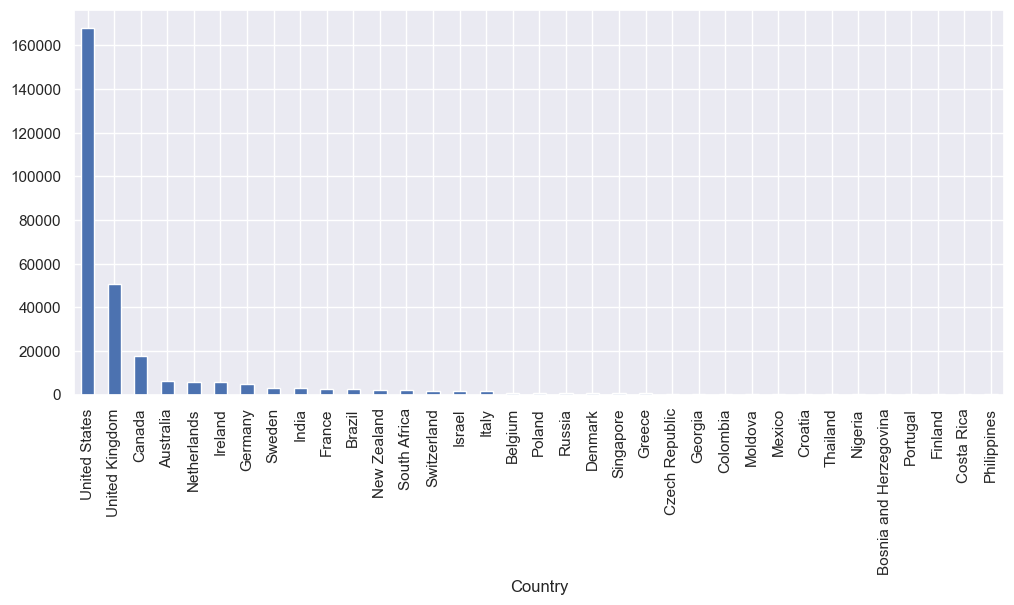

In [120]:
df['Country'].value_counts().plot(kind='bar', figsize=(12,5));

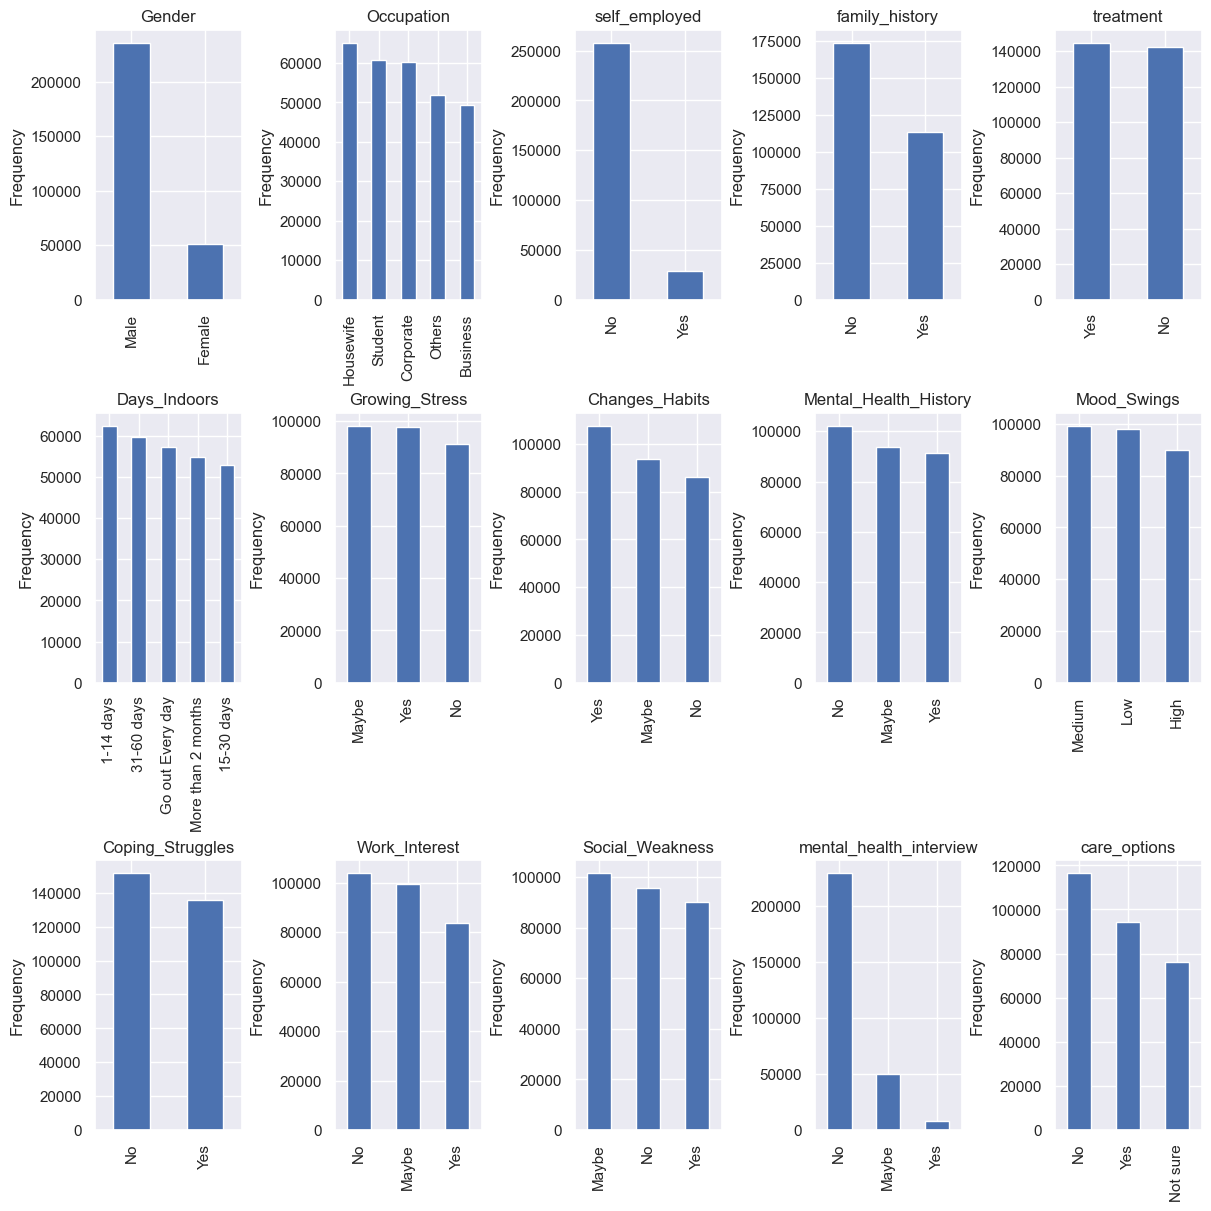

In [82]:
df_vis = df.copy()
df_vis = df_vis.drop(columns=['Timestamp', 'Country'], inplace=False)

# Create subplots
fig, axes = plt.subplots(3, 5, figsize=(12, 12), constrained_layout=True)

# Flatten axes if necessary
axes = axes.flatten()

# Plot each column
for i, col in enumerate(df_vis.columns):
    ax = axes[i]
    df_vis[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for i in range(len(df_vis.columns), len(axes)):
    axes[i].axis('off')

plt.show()

# Research Questions

IMPORTANT: If we use treatment as our Y, keep in mind that people who suffer from mental health problems do not always seek treatment

What kind of questions should our tool be able to answer? <br>
<br>
Question 1: How much (if any) effect do specific (combinations of) features have on a chosen dependant feature? <br>
Question 2: What are the distributions of the data? <br>
Question 3: How do certain attributed change when a user-defined filter is applied to the dataset? <br>
Question 4: What are the clusters or groups within the data, if any?